### 201600974 무역학과 김효훈 NNLAB3

In [1]:
import numpy
import scipy.special

class neuralNetWorkTwoHidden:
    
    def __init__(self,inputnodes,hiddennodes,secondhnodes,outputnodes,learningrate):
        self.inodes = inputnodes
        self.hnodes = hiddennodes
        self.shnodes = secondhnodes
        self.onodes = outputnodes
        self.lr = learningrate
        
        self.wih = numpy.random.normal(0.0,pow(self.hnodes,-0.5), (self.hnodes,self.inodes))
        self.whh = numpy.random.normal(0.0,pow(self.shnodes,-0.5), (self.shnodes,self.hnodes))
        self.who = numpy.random.normal(0.0,pow(self.onodes,-0.5), (self.onodes,self.shnodes))
                
        self.activation_function = lambda x: scipy.special.expit(x)
        #입력,히든,출력노드 개수, 학습률, 입-히, 히-출, 시그모이드함수 설정

    
    def train(self, inputs_list,targets_list):  #오차를 얻어야 하므로 타겟이 있음
        inputs = numpy.array(inputs_list, ndmin=2).transpose()   #행렬계산을 위해 세로로 행렬배치
        targets = numpy.array(targets_list,ndmin=2).transpose()
        
        hidden_inputs = numpy.dot(self.wih, inputs)
        #은닉노드로 들어가는 수는 (인풋-히든 가중치 점곱 인풋) 순전파 첫번째 가중치
        hidden_outputs = self.activation_function(hidden_inputs) 
        #은닉노드에서 나온 수를 활성화 함수에 적용. 순전파 첫번째 활성화
    
        hidden2_inputs = numpy.dot(self.whh,hidden_outputs)
        hidden2_outputs = self.activation_function(hidden2_inputs)
    
        final_inputs = numpy.dot(self.who, hidden2_outputs)
        #출력노드로 들어가는 수는 (히든-출력가중치 점곱 순전파 첫번째 결과)
        final_outputs = self.activation_function(final_inputs)
        #출력노드에서 나온 수는 활성화 함수에 적용 해서 순전파 결과 얻어냄
        #순전파 끝
        
        #역전파 시작
        output_errors = targets - final_outputs # 목표 - 오차
        
        hidden2_errors = numpy.dot(self.who.transpose(),output_errors)
        
        hidden_errors = numpy.dot(self.whh.transpose(),hidden2_errors) # 역전파 출력-히든 (정규화 됨)
        
        self.who += self.lr * numpy.dot((output_errors* final_outputs * (1.0-final_outputs)),numpy.transpose(hidden2_outputs))    
        self.whh += self.lr * numpy.dot((hidden2_errors* hidden2_outputs * (1.0-hidden2_outputs)),numpy.transpose(hidden_outputs))
        self.wih += self.lr * numpy.dot((hidden_errors* hidden_outputs * (1.0-hidden_outputs)),numpy.transpose(inputs))
        
        
    def query(self, inputs_list):
        inputs = numpy.array(inputs_list, ndmin=2).transpose()   #행렬계산을 위해 세로로 행렬배치
        
        hidden_inputs = numpy.dot(self.wih, inputs)
        #은닉노드로 들어가는 수는 (인풋-히든 가중치 점곱 인풋) 순전파 첫번째 가중치
        hidden_outputs = self.activation_function(hidden_inputs) 
        #은닉노드에서 나온 수를 활성화 함수에 적용. 순전파 첫번째 활성화
    
        hidden2_inputs = numpy.dot(self.whh,hidden_outputs)
        hidden2_outputs = self.activation_function(hidden2_inputs)
    
        final_inputs = numpy.dot(self.who, hidden2_outputs)
        #출력노드로 들어가는 수는 (히든-출력가중치 점곱 순전파 첫번째 결과)
        final_outputs = self.activation_function(final_inputs)
        
        return final_outputs 
    
    

In [6]:
%matplotlib inline
import matplotlib.pyplot
import imageio
import glob

숫자 -  2


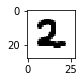

숫자 -  0


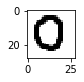

숫자 -  1


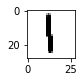

숫자 -  6


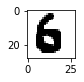

숫자 -  0


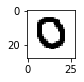

숫자 -  0


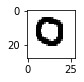

숫자 -  9


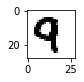

숫자 -  7


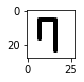

숫자 -  4


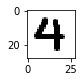

숫자 -  2


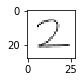

숫자 -  0


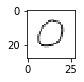

숫자 -  1


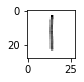

숫자 -  6


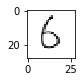

숫자 -  0


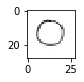

숫자 -  0


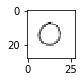

숫자 -  9


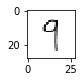

숫자 -  7


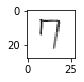

숫자 -  4


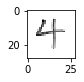

In [7]:
for image_file_name in glob.glob("my_own_images/myp??.png"): #그림판 출력
    
    correct_label = int(image_file_name[-5:-4])
    
    print("숫자 - ",correct_label)
    
    image_array = imageio.imread(image_file_name) 
    image_array = image_array[:,:,0]
    
    image_data = 255.0- image_array.reshape(784)
    image_data = ((image_data/ 255.0)* 0.99)+ 0.01
    
    matplotlib.pyplot.subplot(1,6,1)
    matplotlib.pyplot.imshow(image_array, cmap="gist_gray",interpolation="None")
    matplotlib.pyplot.show()
    outputs = n.query(image_data)

for image_file_name in glob.glob("my_own_images/my??.png"): #손글씨 출력
    
    correct_label = int(image_file_name[-5:-4])
    
    print("숫자 - ",correct_label)
    
    image_array = imageio.imread(image_file_name) 
    image_array = image_array[:,:,0]
    
    image_data = 255.0- image_array.reshape(784)
    image_data = ((image_data/ 255.0)* 0.99)+ 0.01
    
    matplotlib.pyplot.subplot(1,6,1)
    matplotlib.pyplot.imshow(image_array, cmap="gist_gray",interpolation="None")
    matplotlib.pyplot.show()
    outputs = n.query(image_data)


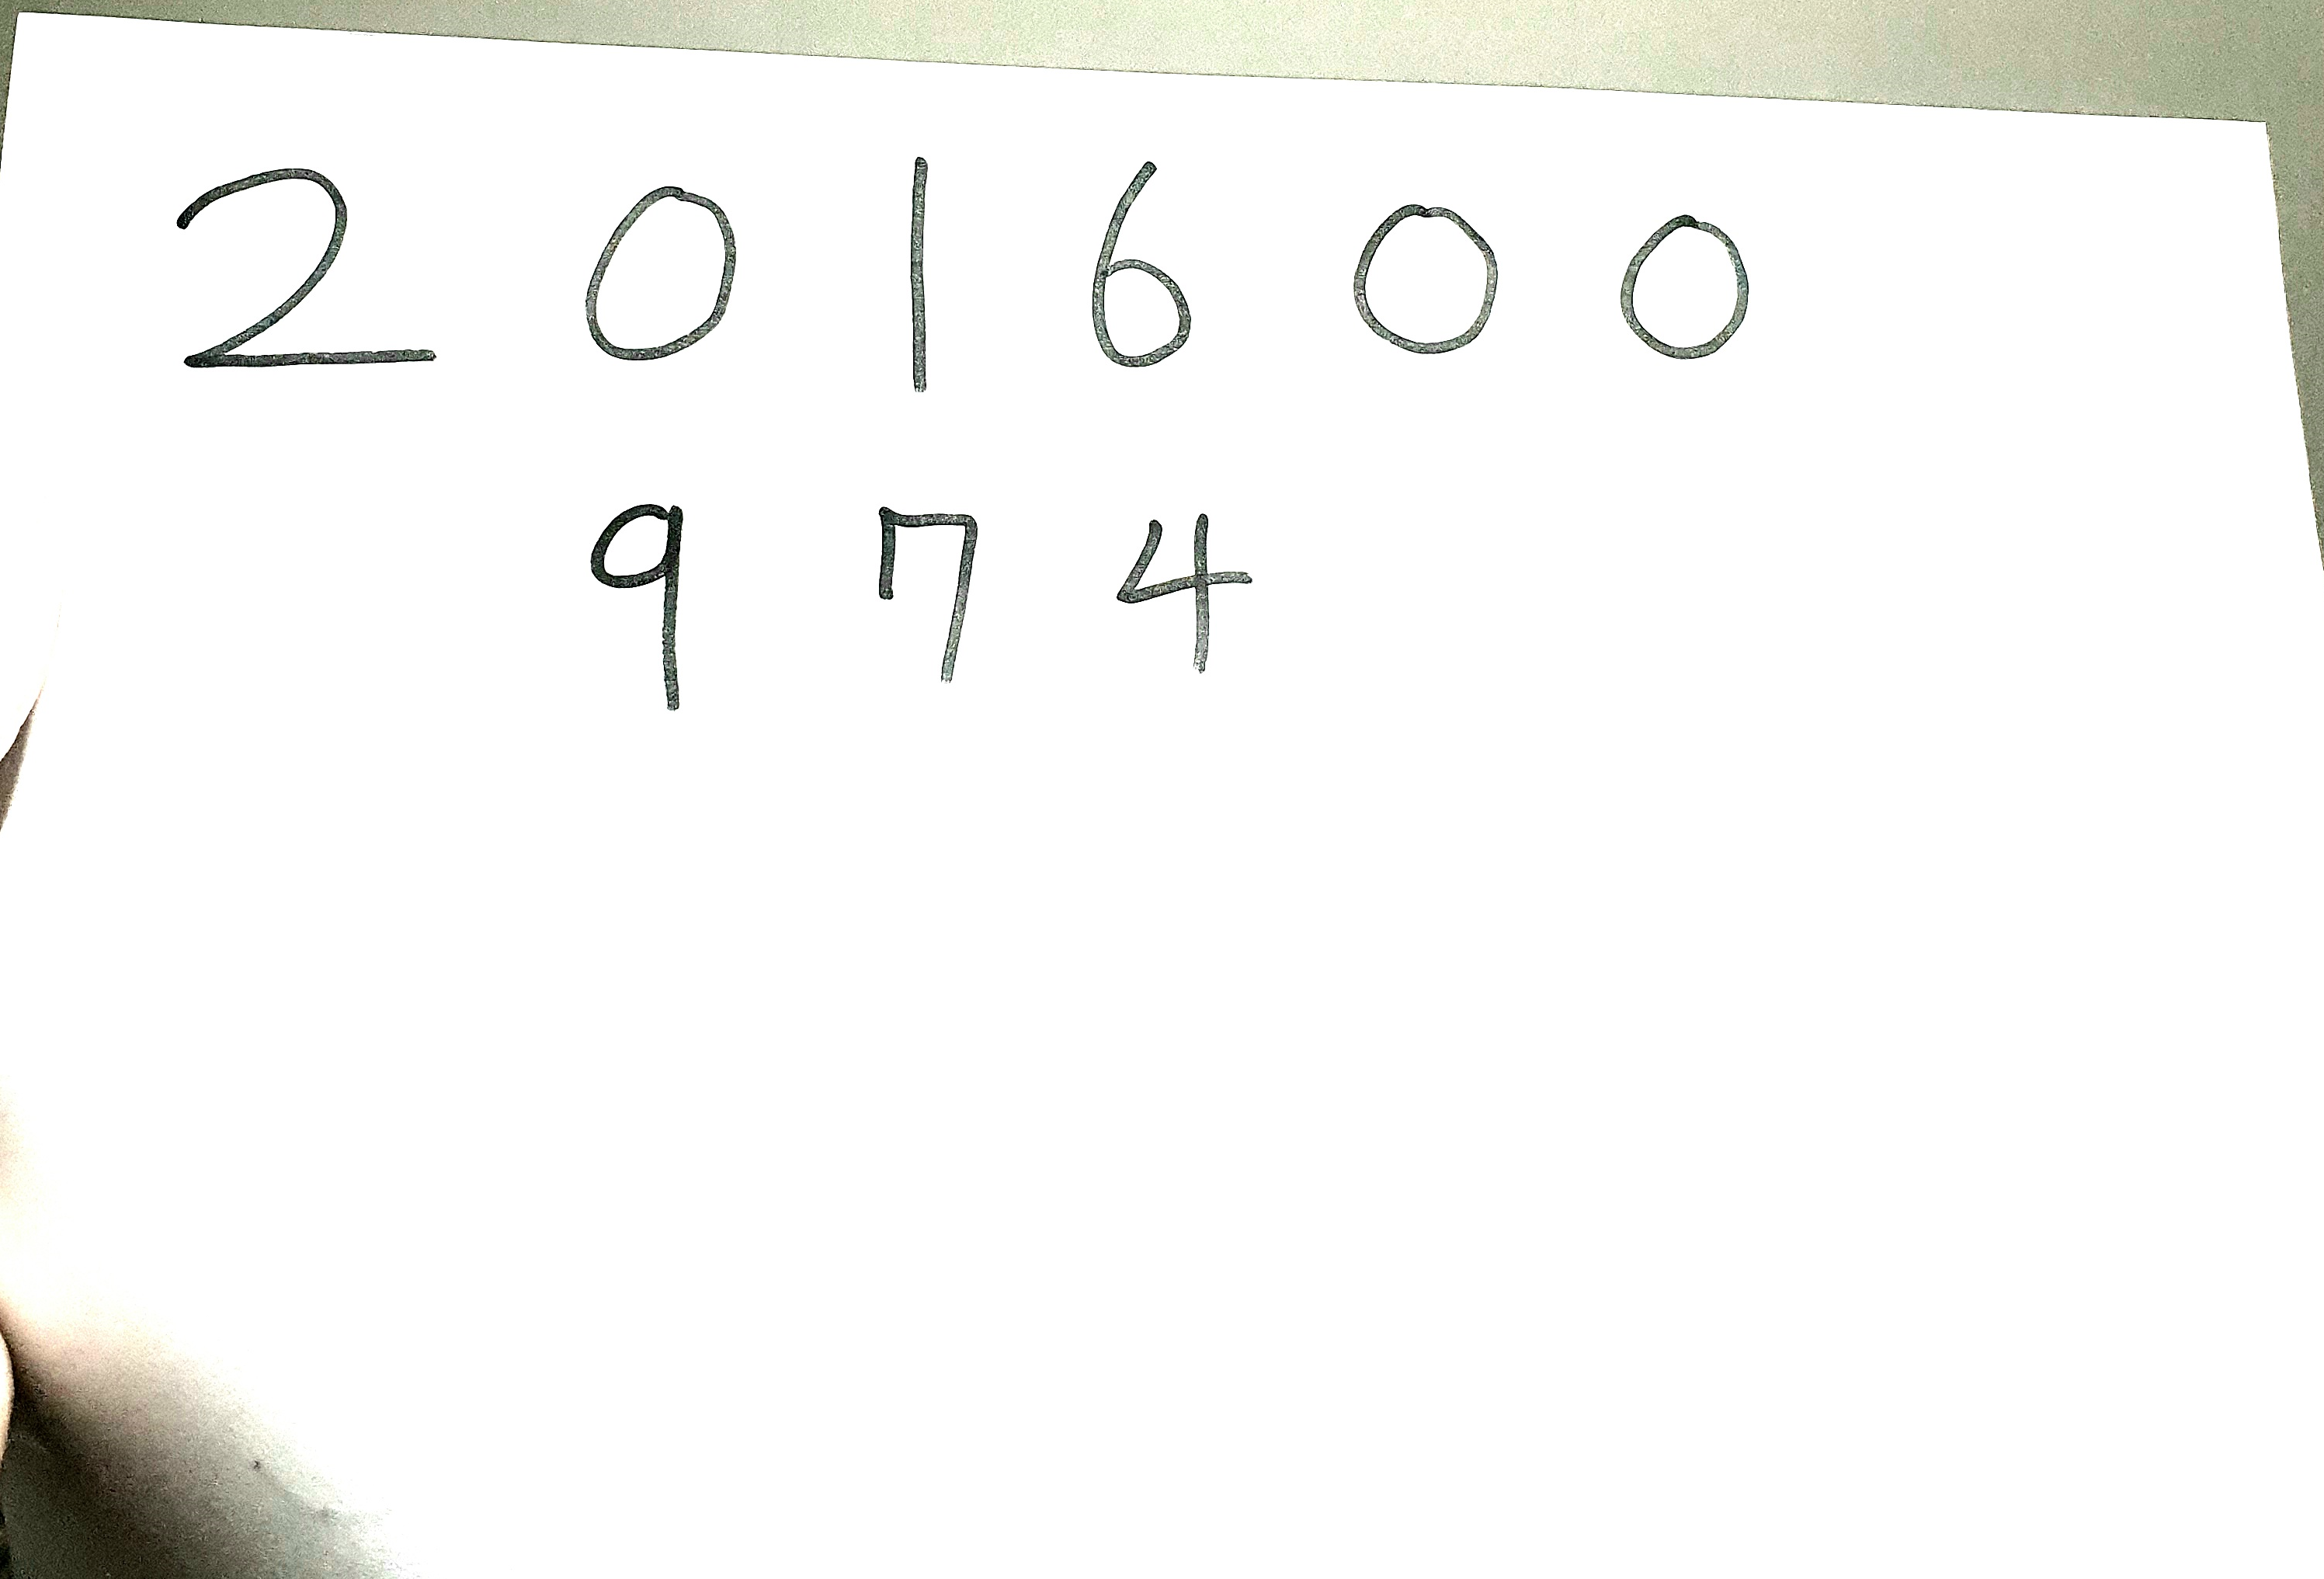

In [3]:
import scipy.ndimage

input_nodes =784
hidden_nodes =65
shidden_nodes =65
output_nodes =10

learning_rate =0.01
n = neuralNetWorkTwoHidden(input_nodes,hidden_nodes,shidden_nodes,output_nodes,learning_rate)

In [11]:
training_data_file = open("mnist_dataset/mnist_train.csv","r")
training_data_list = training_data_file.readlines()
training_data_file.close()

epochs =10

def disconnect(v):
    newv =[i*(i>50) for i in v]
    return np.array(newv)


for e in range(epochs):
    for record in training_data_list:
        all_values = record.split(',')
        inputs = (numpy.asfarray(all_values[1:])/255.0*0.99)+0.01        
        if(e %3 == 0):
            inputs = (numpy.asfarray(all_values[1:])/255.0*0.99)+0.01
        elif(e %3 == 1):
            inputs = scipy.ndimage.interpolation.rotate(inputs.reshape(28,28), 10,cval=0.01, reshape = False)
        elif(e%3 == 2):
            inputs = scipy.ndimage.interpolation.rotate(inputs.reshape(28,28), -10,cval=0.01, reshape = False)
        
        targets = numpy.zeros(output_nodes) + 0.01
        targets[int(all_values[0])] = 0.99
        
        inputs = inputs.reshape(784)
        n.train(inputs, targets)

scorecard = []

                    
for image_file_name in glob.glob("my_own_images/my??.png"):
                                                   #종이에 그린 손글씨 실행
    correct_label = int(image_file_name[-5:-4])
    
    print("숫자 - ",correct_label)
    
    image_array = imageio.imread(image_file_name) 
    image_array = image_array[:,:,0]
    
    image_data = 255.0- image_array.reshape(784)
    image_data = ((image_data/ 255.0)* 0.99)+ 0.01
    

    matplotlib.pyplot.subplot(1,6,1)
    matplotlib.pyplot.imshow(image_array, cmap="gist_gray",interpolation="None")
    matplotlib.pyplot.show()
    outputs = n.query(image_data)
    
    label = numpy.argmax(outputs)
    print(label)
    if(label == correct_label):
        scorecard.append(1)
    else:
        scorecard.append(0)

    
scorecard_array = numpy.asarray(scorecard)
print("performance =",scorecard_array.sum()/scorecard_array.size)
print("은닉 계층 수 -",hidden_nodes,",",shidden_nodes)
print("학습률 -",0.01)
print("주기수 -",epochs)
print("최고 정확도 - 0.9679%")
print("201600974 무역학과 김효훈")

#이 손글씨에서는 오차가 나오지 않았지만, 두께를 매우 두껍게 숫자를 그렸을 때 오차가 빈번하게 발생 했었다.
#즉 손글씨체가 아니면 오차가 나올 수 있다.
#그리고, 사진이 어두울 경우 배경화면이 회색값을 가지게 될 수있다.
#그래서 disconnect 함수를 임의로 정의해서, 약간의 회색은 흰색으로 처리되는 렐루함수를 적용시키기도했다.
#어느정도는 효과가 있었지만, 글씨체가 손글씨가 아니면 오차는 항상 나타나는 것 같았다.
#명도를 높인 사진을 사용하니, disconnect함수는 필요가 없어졌다.

KeyboardInterrupt: 

### 201600974 무역학과 김효훈